# imports

In [6]:
import numpy as np
import xarray as xr
import h5py
from os.path import join

import matplotlib.pyplot as plt
import process_FERMI as pf
from importlib import reload

In [114]:
# execute after modifying library
pf = reload(pf)

# load non-image data

In [115]:
basefolder = './testdata/F6_Scan2/'

exp = pf.get_exp_dataframe(basefolder)
for k in ['xgm_UH', 'xgm_SH']:
    exp[k + '_mean'] = exp[k].apply(np.mean)


Let's have a look at it

In [116]:
exp

,filename,xgm_UH,xgm_SH,filter_seed,wavelength,diode_I0,polarization,harmonic,delay,alignz,samplez,valve_pos2,valve_dpi3,comment,xgm_UH_mean,xgm_SH_mean
0,./testdata/F6_Scan2/rawdata/F6_Scan2_163566276.h5,"[31.608288077805778, 24.054997914248865, 19.95...","[4.013813812184072, 3.1157464618981434, 2.5481...",Al-200,20.8,"[148.29769134521484, 110.25238037109375, 86.64...",3.0,12.0,139.60,53.499987,-0.000529,3,3,"1. 1 of 141. Delay 139.600 mm - IR 123uJ, UV 8...",27.248608,3.469665
1,./testdata/F6_Scan2/rawdata/F6_Scan2_163566397.h5,"[31.818450242942262, 30.080162743601022, 28.83...","[4.0090751726935405, 3.8203728650552846, 3.701...",Al-200,20.8,"[141.24155044555664, 128.84445190429688, 133.1...",3.0,12.0,139.60,53.499987,-0.000532,3,3,"1. 1 of 141. Delay 139.600 mm - IR 123uJ, UV 8...",30.014540,3.762386
2,./testdata/F6_Scan2/rawdata/F6_Scan2_163566781.h5,"[34.596677782294556, 34.39155355561752, 31.670...","[4.350732913795905, 4.437113089158626, 3.99594...",Al-200,20.8,"[156.58235549926758, 166.76387786865234, 139.6...",3.0,12.0,139.61,53.499987,-0.000532,3,3,"1. 2 of 141. Delay 139.610 mm - IR 123uJ, UV 8...",33.381774,4.146593
3,./testdata/F6_Scan2/rawdata/F6_Scan2_163566900.h5,"[26.521180086748224, 31.86666150189898, 35.154...","[3.308038811195036, 3.9767212811654717, 4.3425...",Al-200,20.8,"[120.05538940429688, 145.97711563110352, 164.0...",3.0,12.0,139.61,53.499987,-0.000531,3,3,"1. 2 of 141. Delay 139.610 mm - IR 123uJ, UV 8...",32.857962,4.032113
4,./testdata/F6_Scan2/rawdata/F6_Scan2_163567113.h5,"[34.18544635300319, 36.20215601083588, 37.6335...","[4.022032198164109, 4.194616784712914, 4.37295...",Al-200,20.8,"[149.94535446166992, 155.57069778442383, 167.1...",3.0,12.0,139.62,53.499987,-0.000532,3,3,"1. 3 of 141. Delay 139.620 mm - IR 123uJ, UV 8...",30.415972,3.563510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,./testdata/F6_Scan2/rawdata/F6_Scan2_163605601.h5,"[31.905453769987062, 33.975783555776324, 35.10...","[4.364267069293834, 4.648768033744595, 4.79763...",Al-200,20.8,"[135.2497100830078, 152.2547721862793, 171.562...",3.0,12.0,140.68,53.499987,-0.000543,3,3,"1. 109 of 141. Delay 140.680 mm - IR 123uJ, UV...",31.427516,4.291722
218,./testdata/F6_Scan2/rawdata/F6_Scan2_163605813.h5,"[34.06444875340083, 29.563197529935415, 31.995...","[4.173998282773444, 3.5841000438707624, 3.8629...",Al-200,20.8,"[153.7405014038086, 134.75561141967773, 138.66...",3.0,12.0,140.69,53.499987,-0.000545,3,3,"1. 110 of 141. Delay 140.690 mm - IR 123uJ, UV...",28.568146,3.489429
219,./testdata/F6_Scan2/rawdata/F6_Scan2_163605935.h5,"[37.82386436859074, 37.22624993158714, 33.4044...","[4.640610749866626, 4.517356515366241, 4.00965...",Al-200,20.8,"[183.96520614624023, 172.15490341186523, 147.6...",3.0,12.0,140.69,53.499987,-0.000545,3,3,"1. 110 of 141. Delay 140.690 mm - IR 123uJ, UV...",31.670017,3.870167
220,./testdata/F6_Scan2/rawdata/F6_Scan2_163606143.h5,"[34.4212664184427, 37.306444676703265, 37.0816...","[4.181285181852819, 4.559977205338056, 4.56885...",Al-200,20.8,"[155.4488182067871, 176.15318298339844, 171.21...",3.0,12.0,140.70,53.499987,-0.000545,3,3,"1. 111 of 141. Delay 140.700 mm - IR 123uJ, UV...",33.080299,4.055835


## filter entries

In [ ]:
# ...

# plot single image

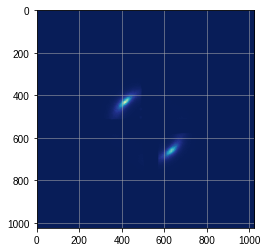

In [77]:
im, meta = pf.loadh5(exp.loc[12, 'filename'])

fig, ax = plt.subplots()
ax.imshow(im)

# Set up the azimuthal integration
This has to be done only once (unless the image center shifts, or the image shape changes).
Reusing the AzimuthalIntegrator instance is very fast.

In [81]:
ai = pf.AzimuthalIntegrator(im.shape, (549, 527), (0, 179))

norm = ai(np.ones_like(im))

# process delay scan
set up empty DataArray

In [84]:
scan = xr.DataArray(
    np.zeros([len(exp), len(ai.distance)]),
    dims=['delay', 'r'],
    coords={'r': ai.distance, 'delay': exp.delay}
)

test it on our single image

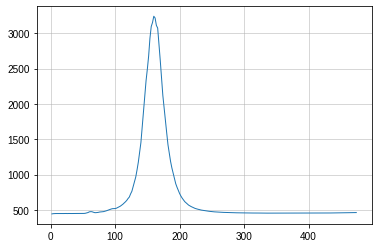

In [82]:
fig, ax = plt.subplots()
ax.plot(ai.distance, ai(im) / norm)

## load dark
I'm just loading a static single dark here

In [98]:
dark = pf.loadh5('testdata/F6_Scan2_BG/rawdata/F6_Scan2_BG_163566569.h5')[0]

## crunch

In [99]:
for index, r in exp.iterrows():
    im, meta = pf.loadh5(r['filename'])
    im = im - dark
    scan.loc[{'delay': r['delay']}] = ai(im) / norm / r['xgm_SH_mean']


## plot

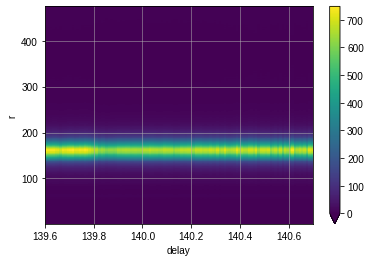

In [102]:
fig, ax = plt.subplots()
scan.plot.imshow(x='delay', y='r', ax=ax, vmin=0, cmap='viridis')

In [107]:
demag = scan.where((scan.r > 140) & (scan.r < 190)).mean('r')

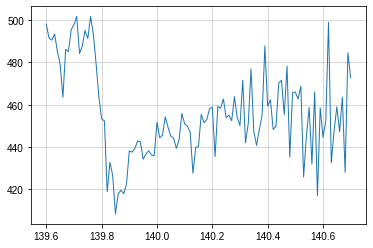

In [108]:
fig, ax = plt.subplots()
ax.plot(demag.delay, demag)